# IMPORTS

## Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Loading Data

In [2]:
dfRaw = pd.read_csv('../../01-Data/Results/01-FirstRoundCRISP/dfFeatureEngineering.csv', low_memory=False, parse_dates=['Date'])

# EXPLORATORY DATA ANALYSIS

In [3]:
dfRaw1 = dfRaw.copy()

## Univariate Analysis

### Response Univariate

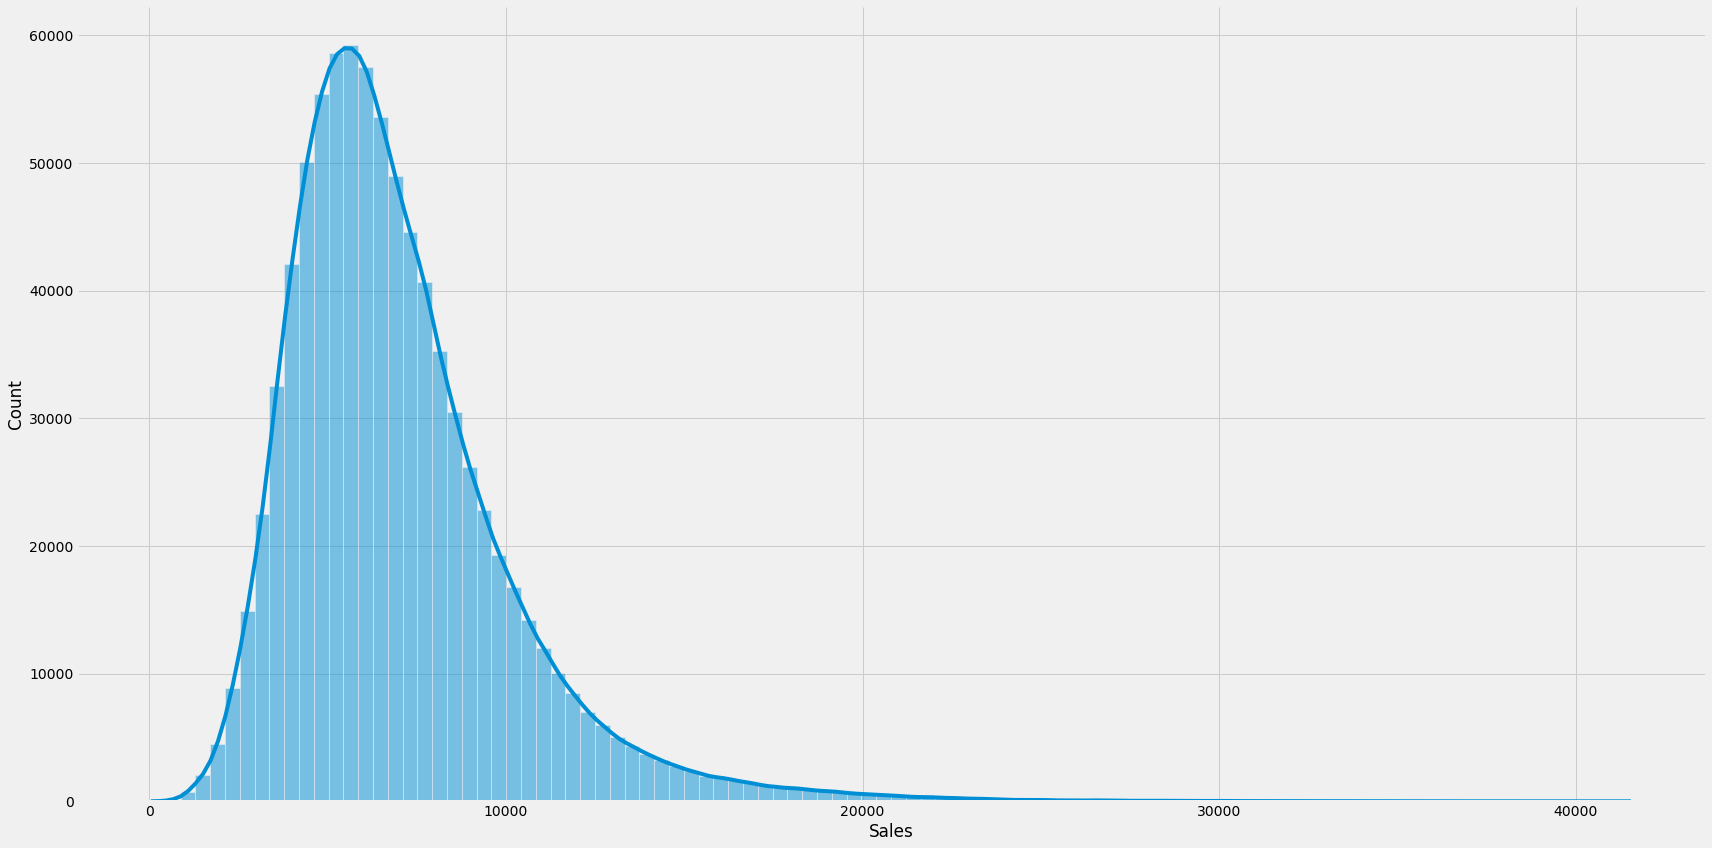

In [4]:
sns.displot(dfRaw1['Sales'], height=12, aspect=2, bins=100, kde=True)

### Numerical Variable

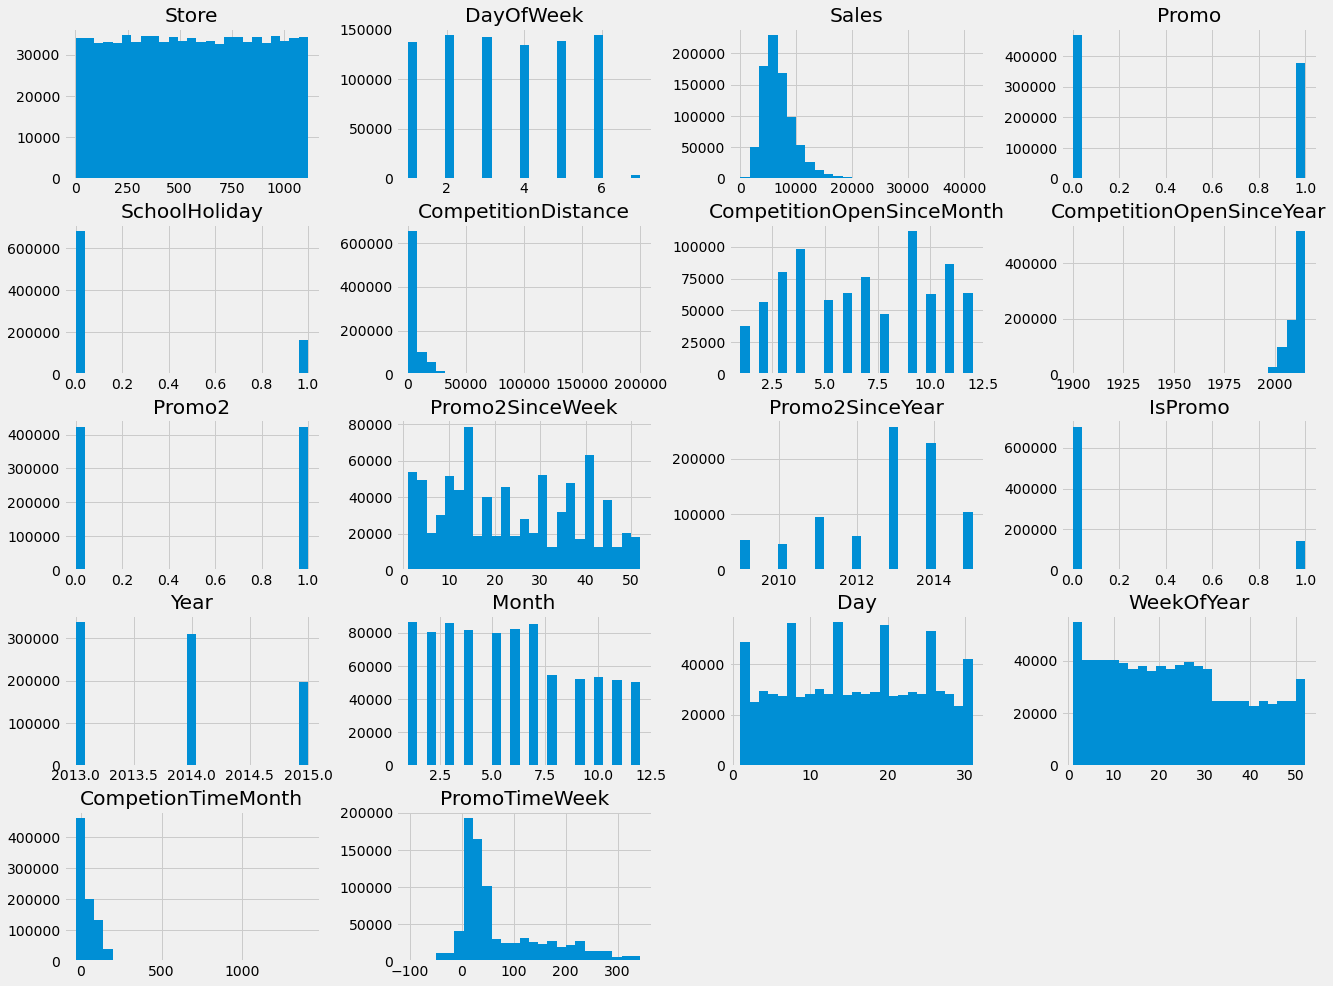

In [5]:
numAttributes = dfRaw1.select_dtypes(include=['int64', 'float64'])
numAttributes.hist(bins=25, figsize=(20,16))
plt.show()

### Categorical Variable

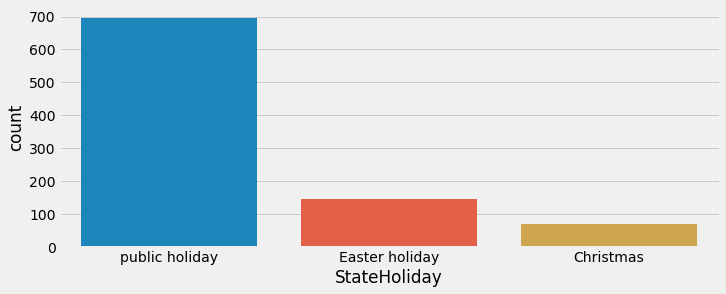

In [6]:
# State Holiday

dfRaw2 = dfRaw1[dfRaw1['StateHoliday'] != 'Regular Day']
sns.catplot(x='StateHoliday', kind='count', data=dfRaw2, height=4, aspect=2.5)
plt.show()

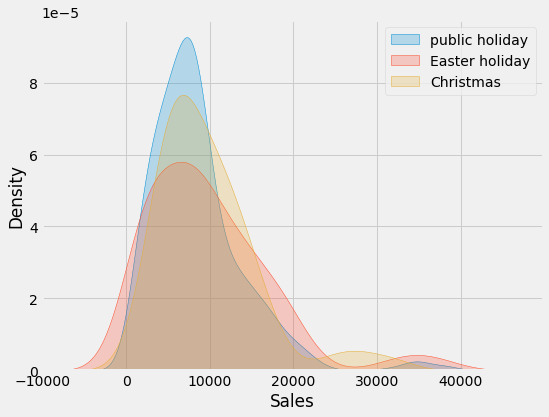

In [7]:
# State Holiday

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'public holiday']['Sales'], label='public holiday', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'Easter holiday']['Sales'], label='Easter holiday', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'Christmas']['Sales'], label='Christmas', shade=True)
plt.legend()

plt.show()

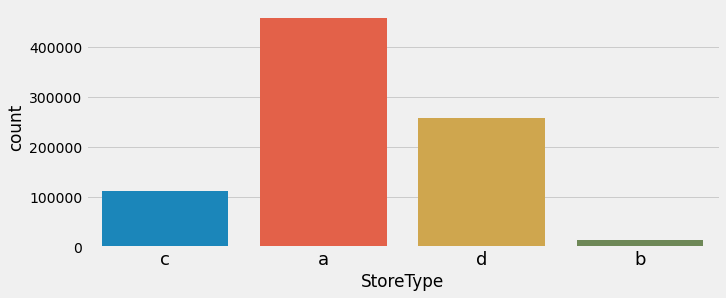

In [8]:
# Store Type

sns.catplot(x='StoreType', kind='count', data=dfRaw1, height=4, aspect=2.5)
plt.xticks(fontsize=18)
plt.show()

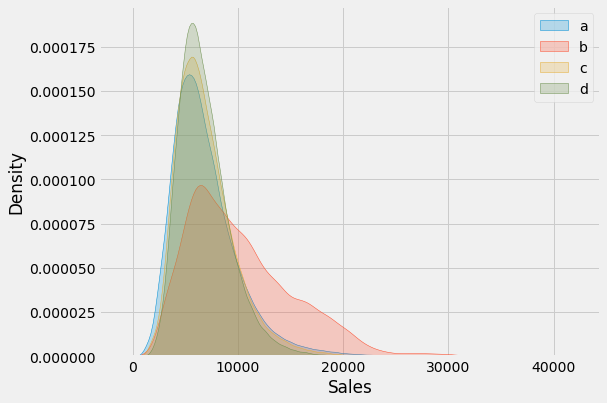

In [9]:
# Store Type

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'a']['Sales'], label='a', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'b']['Sales'], label='b', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'c']['Sales'], label='c', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'd']['Sales'], label='d', shade=True)
plt.legend()

plt.show()

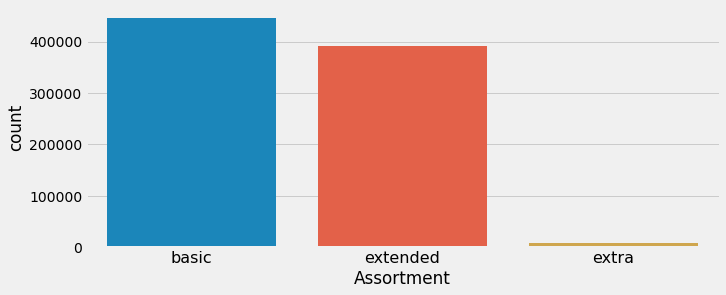

In [11]:
# Store Type

sns.catplot(x='Assortment', kind='count', data=dfRaw1, height=4, aspect=2.5)
plt.xticks(fontsize=16)
plt.show()

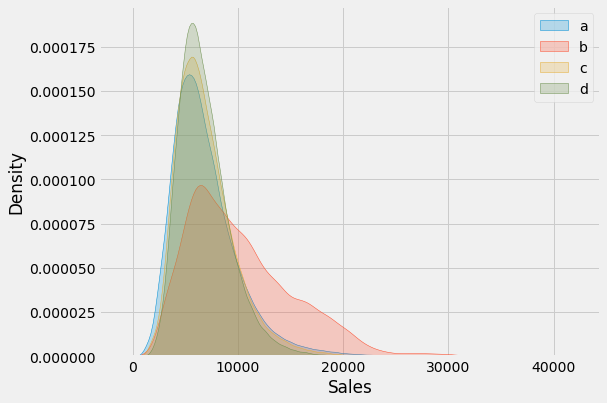

In [12]:
# Store Type

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'a']['Sales'], label='a', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'b']['Sales'], label='b', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'c']['Sales'], label='c', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'd']['Sales'], label='d', shade=True)
plt.legend()

plt.show()